<a href="https://colab.research.google.com/github/jdy5294/Bigdata_Analyst/blob/main/3_3_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%ED%9A%8C%EA%B7%80(%EC%98%88%EC%B8%A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 단순 선형 회귀분석을 이용한 예측 문제 해결

#### 1-1. 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

autompg = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv")
autompg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [2]:
autompg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


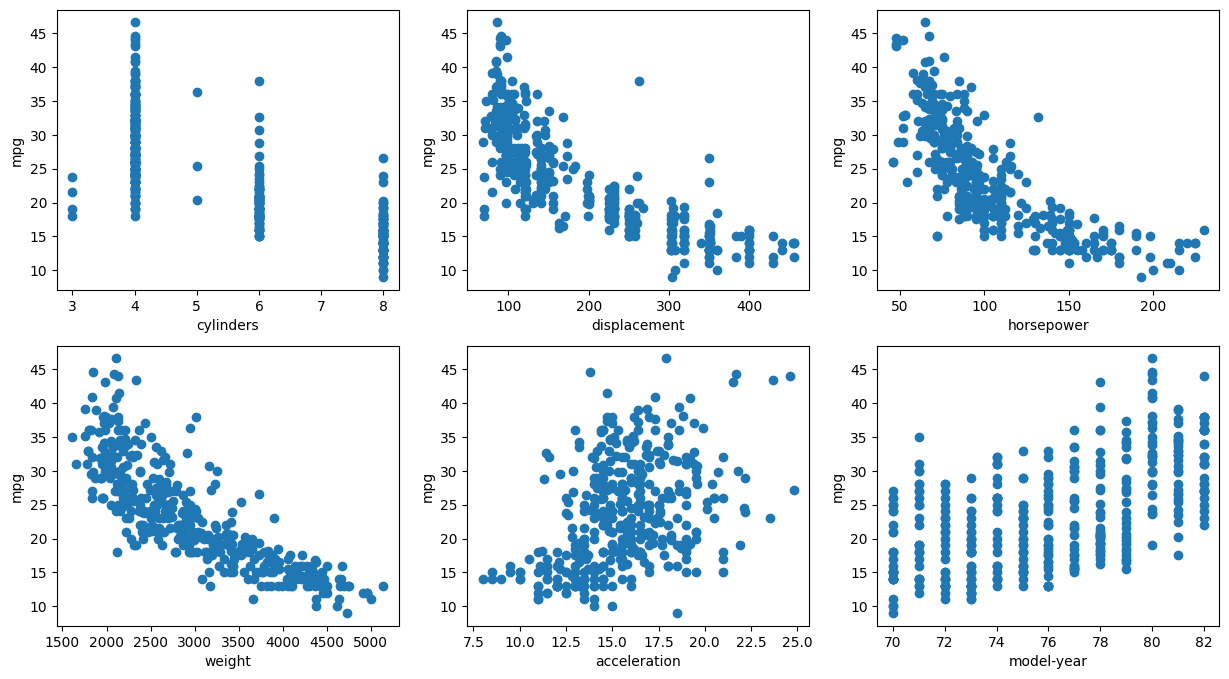

In [3]:
plt.figure(figsize=(15,8))

for i in range(1,7):
  plt.subplot(2,3,i)
  plt.scatter(x=autompg.iloc[:,i], y=autompg['mpg'])
  plt.xlabel(autompg.columns[i])
  plt.ylabel('mpg')
plt.show()

In [4]:
corr = autompg.corr(method='pearson')
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
mpg,1.000000,-0.775396,-0.804203,-0.777575,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.843751,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897787,0.932824,-0.543684,-0.370164
horsepower,-0.777575,0.843751,0.897787,1.000000,0.864350,-0.687241,-0.420697
weight,-0.831741,0.896017,0.932824,0.864350,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.687241,-0.417457,1.000000,0.288137
model-year,0.579267,-0.348746,-0.370164,-0.420697,-0.306564,0.288137,1.000000


#### 1-2. 데이터 전처리

In [5]:
autompg.dropna(axis=0, inplace=True)
autompg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           396 non-null    float64
 1   cylinders     396 non-null    int64  
 2   displacement  396 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        396 non-null    int64  
 5   acceleration  396 non-null    float64
 6   model-year    396 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 24.8 KB


#### 1-3. 데이터 분석 수행

In [6]:
# 데이터 분리
X = autompg[['weight']]
y = autompg['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# 데이터 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 회귀식의 기울기와 y절편 출력
print('기울기:', lr.coef_)
print('y절편:', lr.intercept_, '\n')

# 예측 수행
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

# 모델 성능평가
score_train = r2_score(y_train, pred_train)
score_test = r2_score(y_test, pred_test)
print('학습 정확도:', score_train)
print('테스트 정확도:', score_test)

기울기: [-0.00774371]
y절편: 46.62501834798047 

학습 정확도: 0.6875735975346924
테스트 정확도: 0.7015633872576372


### 2. 다중 선형 회귀분석을 이용한 예측 문제 해결

#### 2-1. 데이터 불러오기

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

housing = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### 2-2. 데이터 전처리

In [9]:
# 결측치 처리
housing.dropna(axis=0, inplace=True)

# 범주형 값 분석 제외
housing.drop('ocean_proximity', axis=1, inplace=True)

housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [10]:
corr = housing.corr(method='pearson')
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


#### 2-3. 데이터 분석 수행

In [11]:
# 데이터 분리
X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 데이터 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 회귀식의 기울기와 y절편 출력
print('기울기:', lr.coef_)
print('y절편:', lr.intercept_, '\n')

# 예측 수행
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

# 모델 성능평가
score_train = r2_score(y_train, pred_train)
score_test = r2_score(y_test, pred_test)
print('학습 정확도:', score_train)
print('테스트 정확도:', score_test)

기울기: [-4.21262308e+04 -4.20623763e+04  1.18784999e+03 -8.57874086e+00
  1.18123421e+02 -3.55751755e+01  3.73676747e+01  4.03297253e+04]
y절편: -3530241.307796566 

학습 정확도: 0.6334125389213838
테스트 정확도: 0.6445130291082337


### 3. 의사결정나무를 이용한 예측 문제 해결

#### 3-3. 데이터 분석 수행

In [12]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor

# 데이터 분리
X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 데이터 학습
dtr = DecisionTreeRegressor(max_depth=3, random_state=42)
dtr.fit(X_train, y_train)

# 예측 수행
pred_train = dtr.predict(X_train)
pred_test = dtr.predict(X_test)

# 모델 성능평가
mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
print('학습 정확도:', mse_train)
print('테스트 정확도:', mse_test)

학습 정확도: 6684086804.552605
테스트 정확도: 6793101269.876856


### 4. 랜덤 포레스트를 이용한 예측 문제 해결

#### 4-3. 데이터 분석 수행

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

# 데이터 분리
X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 데이터 학습
rfr = RandomForestRegressor(max_depth=3, random_state=42)
rfr.fit(X_train, y_train)

# 예측 수행
pred_train = rfr.predict(X_train)
pred_test = rfr.predict(X_test)

# 모델 성능평가
mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
print('학습 정확도:', mse_train)
print('테스트 정확도:', mse_test)

학습 정확도: 6342421033.759215
테스트 정확도: 6447828605.376922
